In [8]:
import pandas as pd

# df=pd.read_csv('..\\data\\fraud.csv', index_col = 0)
df = pd.read_csv('../data/fraud.csv', index_col=0)

# Check your data and define X and y : What is X and what is y? 
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
df[['Class']].value_counts()

Class
0        21337
1          356
Name: count, dtype: int64

In [19]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
# check the number of rows in the training and testing data

In [20]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------## 
#--------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier(n_neighbors = 5))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

[[8538    3]
 [  28  109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.97      0.80      0.88       137

    accuracy                           1.00      8678
   macro avg       0.98      0.90      0.94      8678
weighted avg       1.00      1.00      1.00      8678

0.9186226676477651


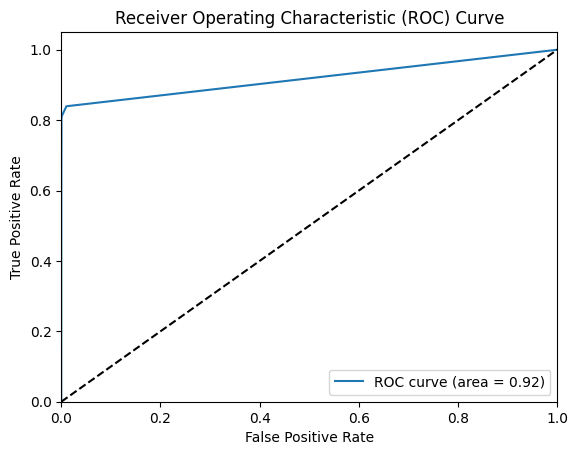

In [5]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [21]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12793     3]
 [   39   180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.98      0.82      0.90       219

    accuracy                           1.00     13015
   macro avg       0.99      0.91      0.95     13015
weighted avg       1.00      1.00      1.00     13015

0.9992349207300798


In [22]:
import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000268,0.715481,1.0
2,0.000268,0.740586,0.8
3,0.000401,0.753138,0.6
4,0.000535,0.774059,0.4
5,0.008831,0.828452,0.2
6,1.000000,1.000000,0.0


### a)
Fraud detection is the systematic process of identifying and preventing fraudulent activities across financial transactions, applications, APIs, systems, and data. It involves continuous monitoring of transactions and customer behavior to detect anomalies, patterns, or suspicious activity that may indicate fraud. The goal is to proactively mitigate risk, minimize financial losses, protect assets, ensure compliance, and maintain customer trust.

Modern fraud detection leverages adaptive and predictive analytics, often powered by machine learning (ML), to assess risk, analyze large datasets, identify data relationships, monitor approval patterns, authenticate users, and generate alerts for investigation.

Fraud detection is important for
- preventing financial losses
- maintaining customer trust and protecting business reputation
- ensuring compliance
- maintaining operational efficiency
- combating financial crime such as money laundering and embezzlement
- enhancing data security

#### References
- https://www.f5.com/glossary/fraud-detection
- https://www.ibm.com/think/topics/fraud-detection
- https://www.quantexa.com/resources/fraud-detection/
- https://www.fraud.com/post/fraud-detection


### b)
Originally, 40-60 train-test split is used in the notebook. When 70% training and 30% testing split is used, the model's AUC increased from 0.92 to 0.93. Therefore, 40-60 split is marginally outperformed (~0.01) by the 70-30 split. Having more training data makes the model better, but it is marginal.

In [26]:
# perform train - test split. (70% as training and 30% as testing)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.30,
                                    random_state=1)

In [27]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------##
#--------------------------------------------------

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors = 5))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

[[6398    3]
 [  22   85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       0.97      0.79      0.87       107

    accuracy                           1.00      6508
   macro avg       0.98      0.90      0.93      6508
weighted avg       1.00      1.00      1.00      6508

0.9287151394276887


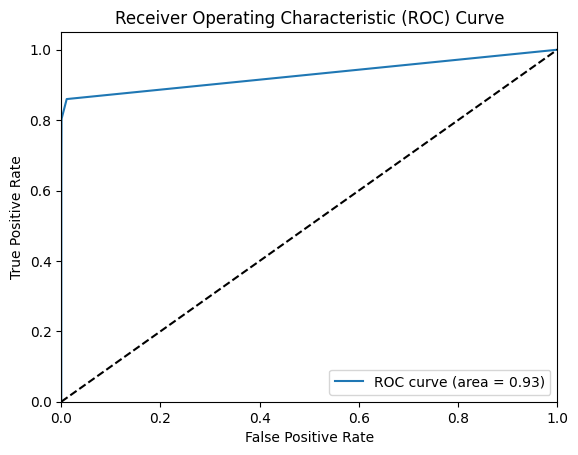

In [28]:
#--------------------------------------------------
## Model Evaluation ##
#--------------------------------------------------

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [29]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[14933     3]
 [   44   205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14936
           1       0.99      0.82      0.90       249

    accuracy                           1.00     15185
   macro avg       0.99      0.91      0.95     15185
weighted avg       1.00      1.00      1.00     15185

0.999288799547413


In [18]:
import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000268,0.715481,1.0
2,0.000268,0.740586,0.8
3,0.000401,0.753138,0.6
4,0.000535,0.774059,0.4
5,0.008831,0.828452,0.2
6,1.000000,1.000000,0.0


### c)
```
k = 1, AUC = 0.91, AUC train = 1.0
k = 2, AUC = 0.91, AUC train = 0.99
k = 3, AUC = 0.92, AUC train = 0.99
k = 4, AUC = 0.92, AUC train = 0.99
k = 5, AUC = 0.92, AUC train = 0.99
k = 6, AUC = 0.92, AUC train = 0.99
k = 7, AUC = 0.93, AUC train = 0.99
k = 8, AUC = 0.93, AUC train = 0.99
```
k value is tested from 1 to 8. It is observed that k values 1, 2 have worst performance (lowest AUC score). In the case of k = 1, AUC score on train dataset is 1.0, therefore, the contrast between train and test AUC scores show that the model is overfitting. The model performs better and better as k is increased. k = 7,8 are found to be the best. "best" here is defined by better AUC score on the test dataset (better performance) and relatively lower AUC score on the train dataset (better generalization).

In [51]:
# perform train - test split. (40% as testing and 60% as training)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.40,
                                    random_state=1)
# check the number of rows in the training and testing data

In [63]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------##
#--------------------------------------------------

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors = 8))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=8))])

[[8538    3]
 [  33  104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.97      0.76      0.85       137

    accuracy                           1.00      8678
   macro avg       0.98      0.88      0.93      8678
weighted avg       1.00      1.00      1.00      8678

0.9253164427147029


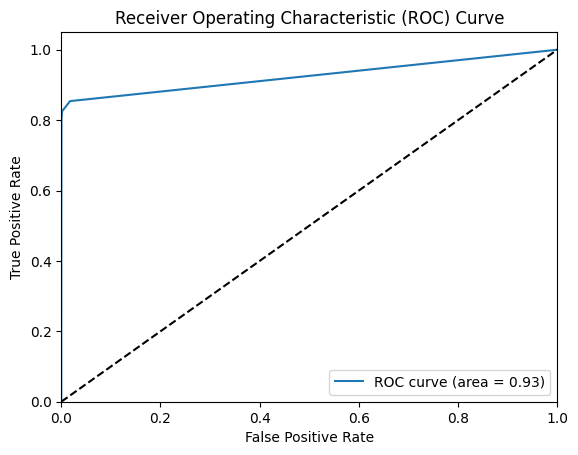

In [64]:
#--------------------------------------------------
## Model Evaluation ##
#--------------------------------------------------

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [61]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12794     2]
 [   46   173]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.99      0.79      0.88       219

    accuracy                           1.00     13015
   macro avg       0.99      0.89      0.94     13015
weighted avg       1.00      1.00      1.00     13015

0.9989699620743354


In [62]:
import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000117,0.583942,1.000000
2,0.000351,0.759124,0.857143
3,0.000351,0.788321,0.571429
4,0.000351,0.795620,0.428571
5,0.001288,0.824818,0.285714
6,0.014635,0.854015,0.142857
7,1.000000,1.000000,0.000000
